1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

2. Load Data

In [3]:
pima= pd.read_csv("diabetes.csv")

3. EDA

In [40]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.shape

(768, 9)

In [6]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

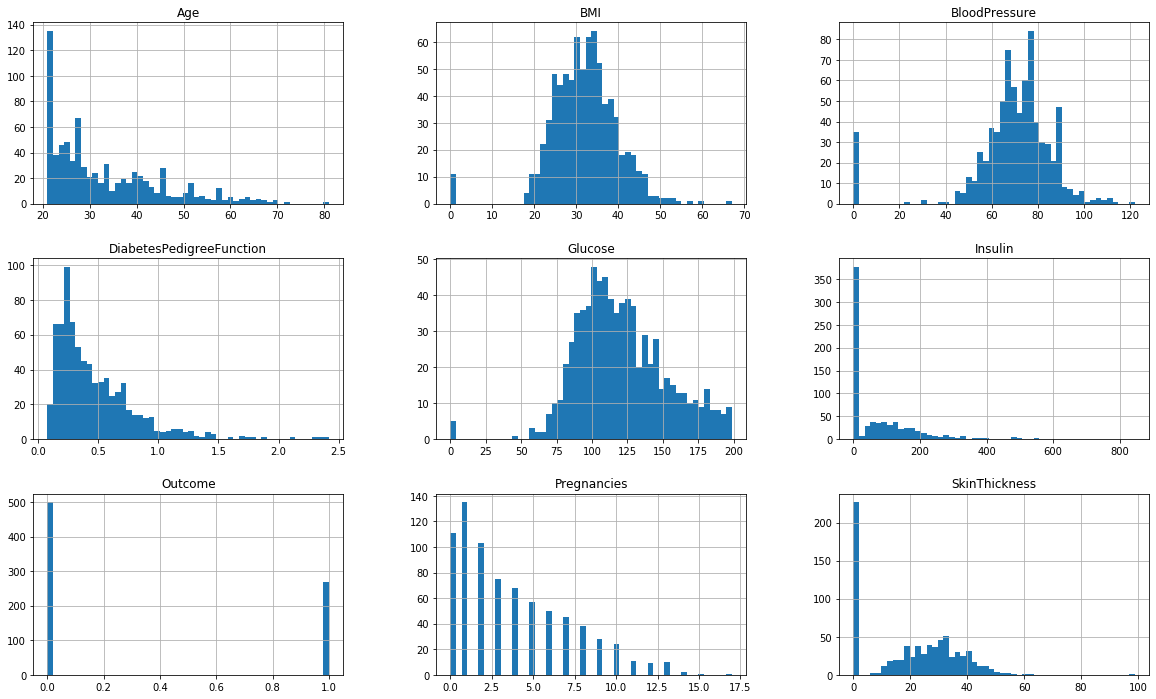

In [7]:
pima.hist(bins=50, figsize=(20,12))
plt.show()

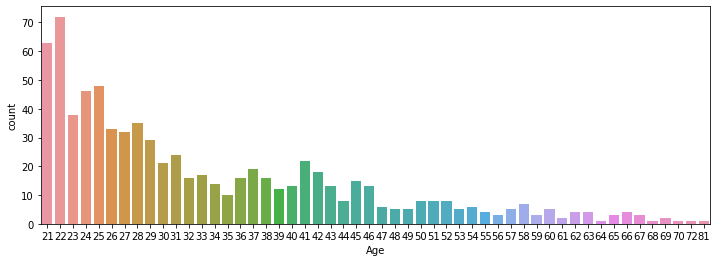

In [16]:
plt.figure(figsize=(12,4))
pima.Age.value_counts()
sns.countplot(x="Age", data=pima)
plt.show()

4. Prepare the Data

In [18]:
X=pima[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
Y=pima.Outcome

In [19]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

5. Training the Algorithm

In [21]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
log = LogisticRegression()

# fit the model with data
log.fit(X_train, y_train)

C:\Users\Nivedita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

I decided to use Logistic Regression for this problem. Logistic regression measures the relationship between dependent variable which is 'Outcome' column, and one or more independent variablIes such as our features 'BMI', 'Age' ect.

6. Evaluating the Algorithm

In [22]:
y_pred=log.predict(X_test)

In [23]:
# import the metrics class
from sklearn import metrics
cnf= metrics.confusion_matrix(y_test, y_pred)
cnf

array([[98,  9],
       [19, 28]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

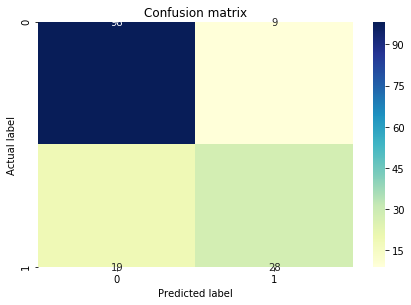

In [39]:
sns.heatmap((cnf), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8181818181818182
Precision: 0.7567567567567568
Recall: 0.5957446808510638


The accuracy of the model is 81.81% to detect the Diabetes.
The model predicted patients are going to suffer from diabetes, that patients have it 76% of the time.
If there are patients who have diabetes in the test set, the Logistic Regression model can identify it 58% of the time.



In [ ]:
7. Making Predictions

In [36]:
y_predict=log.predict([[4,137,40,35,194,33,0.650,55]])
print(y_predict)

[1]


In [33]:
y_predict=log.predict([[3,155,64,28,94,24,0.255,45]])
print(y_predict)

[0]
